# Исследование объявлений о продаже квартир


[Ссылка на презентацию:](https://docs.google.com/presentation/d/1rqCAczqZT5w8sY0M8rCpF3QP_dZ2J0Cy/edit?usp=sharing&ouid=115378190131547711286&rtpof=true&sd=true)

**Цель исследования** — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. В дальнейшем это поможет установить приоритетные параметры для автоматизации систем сервиса, которые помогут отследить аномалии и мошенническую деятельность.

**Входные данные** – архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах от сервиса Яндекс Недвижимость. О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Содержание
- [1.1  Открытие файла с данными и общей информацией](#a)
- [1.2  Предобработка данных](#s)
- [1.3  Посчитайте и добавьте в таблицу новые столбцы](#d)
- [1.4  Проведите исследовательский анализ данных](#f)
- [1.5  Общий вывод](#g)


### Откройте файл с данными и изучите общую информацию.<a id='a'></a> 

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv',sep="\t")# читаем csv-файл, данные слились, поэтому используем разделитель

In [3]:
data.head(10)#Вывjlbv первые 10 строчек датафрейма data на экран

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

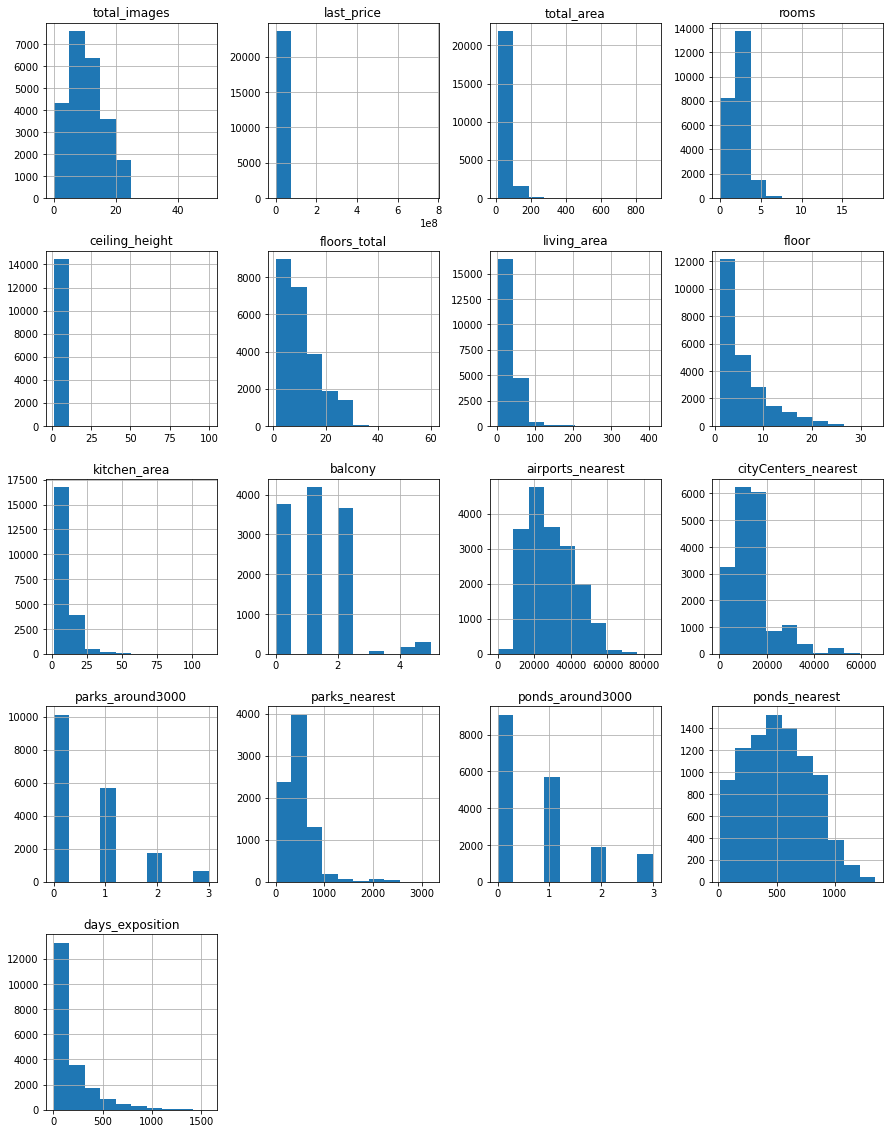

In [5]:
data.hist(figsize=(15, 20))
plt.show()#строим общую гистограмму для всех числовых столбцов таблицы

In [6]:
# Проверим явные дубликаты в датафрейме:

data.duplicated().sum()

0

### Предобработка данных<a id='s'></a>

In [7]:
# Дадим названию столбца cityCenters_nearest красивый вид
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

In [8]:
data.isna().sum()# Найдём и изучим пропущенные значения в столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div style="border:solid green 2px; padding: 20px">
<b>Вывод</b> 
В некоторых столбцах таблицы так много пропусков, которые возникли и по причине пользователей (например, не указано количество балконов и т.п) и картографические ошибки (например, не указано количество водоемов/парков). В столбцах parks_around3000, b ponds_around3000  также были пропуски даже в тех строках, где изначально было указано нулевое количество. Поэотму такие значения было решено заменить на ноль. 

 Причина таких пропусков у пользователей в балконах, скорей всего банальное решение при заполнение анкеты - нет балкона, значит ставим пропуск (заопмним этот факт и предложим в дальнейшем указывать в анкете только числовые значение в данном столбце). Далее, картографические, уж больно они схожи по количеству, поэтому пока предположим, что это ошибка загрузки 
 
 В столбце ceiling_height мы не можем проигнорировать пропуски, но и нулю тоже не могут быть равны, следовательно в дальнейшем заменим их на медианное значение. Такая же история со столбцами living_area, kitchen_area, попробуем заменить медианным значением.  Проверим столбец is_apartment, что лежит внутри него и можно ли это как-то исправить. Столбец locality_name всего 49 пропусков, это мизерная часть от обшей базы, без названия населеного пункта обьявление теряяет свой смысл, т.к даже названия улиц повторяются во многих города, поэтому заменим эти значения на "unknown". Необходимо проверить столбец days_exposition, возможно объявление не закрыто. Это можно проверить посчитав число пропусков по годам. Если получится, что чем позднее год, тем больше в нём пропусков, то обьявление актуально.
 
 В задании написано "Заполните пропущенные значения там, где это возможно", например в столбце cityCenters_nearest точно нельзя корректно ничем заполнить, этого можно было бы избежать, если бы мы знали адрес квартиры или хотя бы индекс. Некоторые столбцы нам не понадобятся для анализа. Например данные ponds_nearest, поэтому их трогать не будем. 
 
 Таким образом, план ближайших действий такой:
 - в столбцах parks_around3000, b ponds_around3000, balcony пропуски заменяем на ноль. В этих же столбцах вещественный тип переведем в целочисленный 
 - в стобце first_day_exposition поменяем тип на датетайм и отредактируем запись
 - проанализировать столбецы ceiling_height, living_area, kitchen_area проверить на аномалии, заменить пропуски
 - проверить столбец is_apartment, заменить пропуски
 - построить график по столбцу days_exposition, если там есть тенденция пропусков по годам, то учесть тот факт, что обьявление все еще открыто
 - в столбце locality_name заменить пропуски на "unknown". Заменим названия в столбце 'locality_name'. Для этого заменим 'ё' на 'е' и 'городской поселок' на 'поселок городского типа'.

<font color='green'>**Шаг 1. в столбцах parks_around3000, b ponds_around3000, balcony пропуски заменяем на ноль. В этих же столбцах вещественный тип переведем в целочисленный**</font>

In [9]:
for column in ['balcony', 'parks_around3000', 'ponds_around3000']:
    data[column] = data[column].fillna(0)# Заполним пропущенные значения 0 там, где это логически возможно. 
    #Если логичную замену предложить невозможно, то оставим эти значения пустыми.
    #Пропуски — тоже важный сигнал, который нужно учитывать.

<font color='green'>**Шаг 2. в стобце first_day_exposition поменяем тип на датетайм и отредактируем запись**</font>

In [10]:
#преобразуем строки в столбце first_day_exposition в datetime, так как данные округлены до дней, то сохраним в днях.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

<font color='green'>**Шаг 3. проанализировать столбцы ceiling_height, living_area, kitchen_area проверить на аномалии, заменить пропуски**</font>

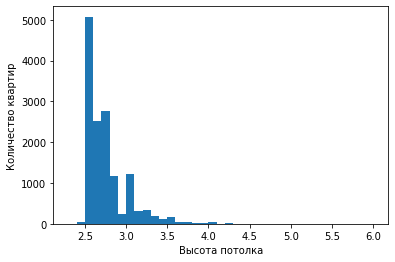

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [11]:
#подробнее рассмотрим диаграмму столбца ceiling_height
plt.hist(data[data['ceiling_height'].notna()].ceiling_height, bins=37, range=(2.3, 6))
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.show()
#посмотрим уникальные значения столбца
display(data['ceiling_height'].sort_values().unique())


In [12]:
# обработаем аномалии поделив на 10 высоты от 10 до 100
data.loc[(data['ceiling_height'] >= 10) & (data['ceiling_height'] <= 100), 'ceiling_height'] = data['ceiling_height'] / 10
display(data['ceiling_height'].sort_values().unique())
#посчитаем количество квартир в которых высота потолков больше 6 м
display('количество квартир имеющих потолки выше 6 м',
 len(data[data['ceiling_height'] > 6].sort_values('ceiling_height')))
#посчитаем количество квартир в которых высота потолков меньше 2 м
display('количество квартир имеющих потолки меньше 2 м',
 len(data[data['ceiling_height'] < 2].sort_values('ceiling_height')))
#присвоем пропускам медианное значение
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].describe() # посмотрим, что получилось

array([ 1.  ,  1.03,  1.2 ,  1.4 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,
        2.3 ,  2.34,  2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,
        2.51,  2.52,  2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,
        2.6 ,  2.61,  2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,
        2.69,  2.7 ,  2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,
        2.78,  2.79,  2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,
        2.87,  2.88,  2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,
        2.96,  2.97,  2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,
        3.05,  3.06,  3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,
        3.14,  3.15,  3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,
        3.24,  3.25,  3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,
        3.33,  3.34,  3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,
        3.43,  3.44,  3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,
        3.52,  3.53,  3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,
        3.62,  3.63,

'количество квартир имеющих потолки выше 6 м'

5

'количество квартир имеющих потолки меньше 2 м'

5

count   23699.00
mean        2.70
std         0.24
min         1.00
25%         2.60
50%         2.65
75%         2.70
max        10.00
Name: ceiling_height, dtype: float64

In [13]:
#Также поступим с аномалиями
data.loc[data['ceiling_height'] < 2.0, 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] > 6.0, 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].describe() # посмотрим, что получилось

count   23699.00
mean        2.70
std         0.22
min         2.00
25%         2.60
50%         2.65
75%         2.70
max         6.00
Name: ceiling_height, dtype: float64

Таким образом, получается, что в столбце ceiling_height была указана высота потолко от 1м до 100. В реальности такого быть не может, поэтому логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Далее, каким значением заменить пропуски? Ноль конечно же поставить нельзя, поэтому построили диаграмму и посмотрели медианное значение. Наиболее популярный вариант это 2.7, в принципе в жизни так оно и есть, даже типовые постройки идут примерно с таким размахом.

Единственный нюанс, что мы смотрим квартиры в Санкт-Петербурге, а это значит, что в центре вполне могуть быть стрые квартриры в которых потолки по 4 м. В таких квартирах обычно делают небольшой 2 этаж. В списке уникальных значений есть от 1 до 2 м, т.к мы смотрим базу квартир, следовательно такие помещения будем считать анамальными, ведь не может человек жить в квартире, которая ему "до пупка" (учитывая, что средний рост взрослого человека 1,65м). Далее, потолки больше 6 м уже точно не являются жилыми и чаще всего относятся к складам, поэтому такие значения также считаем аномалиями. Так как таких аномальных квартир всего 10, то в данном случае заменим их значения на среднее. 

In [14]:
# заполним пропуски в столбце living_area медианым значением по количеству комнат
#data['living_area']=data.groupby(['rooms'])['living_area'].apply(lambda y:y.fillna(y.median()))
#data[data['living_area'] > data['total_area']]['rooms'].count() # проверим, чтобы не вышло жилой площади больше общей

Сперва я решила, заполнить пропуски в столбце living_area медианым значением по количеству комнат, но при сверке обнаружились аномалии в количестве 29 записей, у которых  жилая площадь получалась больше общей. Поэтому было решено пойти другим путем. 

In [15]:
#Найдём коэффициент соотношения средней общей площади (там где она есть .isnull() == False) к среднему жилой площади:
area_kof = data[data['living_area'].isnull() == False]['total_area'].mean() / data[data['living_area'].isnull()== False]['living_area'].mean()  
#Заполняем пропуски отношением общей площади на коэффициент
data['living_area'] = data['living_area'].fillna(data['total_area']/area_kof)

In [16]:
# проверим, чтобы не было жилой площади больше общей
data[data['living_area'] > data['total_area']]['rooms'].count()

0

In [17]:
# используем метод describe () для вычисления статистических данных по столбцу living_area
data['living_area'].describe()

count   23699.00
mean       34.61
std        22.37
min         2.00
25%        19.00
50%        30.00
75%        42.10
max       409.70
Name: living_area, dtype: float64

In [18]:
#посчитаем количество квартир в которых живая площадь меньше 12 м
display('количество квартир имеющих потолки выше 12 м',
 len(data[data['living_area'] < 12].sort_values('living_area')))
#посчитаем количество квартир в которых высота потолков больше 200 м
display('количество квартир имеющих потолки больше 200 м',
 len(data[data['living_area'] > 200].sort_values('living_area')))

'количество квартир имеющих потолки выше 12 м'

146

'количество квартир имеющих потолки больше 200 м'

43

In [19]:
#Также поступим с аномалиями
data.loc[data['living_area'] < 12, 'living_area'] = data['living_area'].median()
data.loc[data['living_area'] > 200, 'living_area'] = data['living_area'].median()
data['living_area'].describe() # посмотрим, что получилось

count   23699.00
mean       34.31
std        19.94
min        12.00
25%        19.00
50%        30.00
75%        42.00
max       200.00
Name: living_area, dtype: float64

Таким образом, при использование первого метода для замены пропусков в столбце living_area, у нас появлялись аномалии в количистве 29 записей, был использован другой подход, в котором сначала был найден коэффициент соотношения средней общей площади к среднему жилой площади и после уже пропуски заполнялись отношением общей площади на коэффициент. Таким способом мы устранили получившуюся аномалию.  

Самые маленькие квартиры, гордо называющиеся "гостинки" имеют размер жилой площади от 12 м². «Гостинки» строили в 1960—1980-х годах как временное жилье. В них жили, пока ждали очереди на полноценную квартиру и сравнивали с номерами в гостинице — отсюда и название. Правда, в наше время временное жильё трансформируется в современную "студию". Следовательно, те что меньше 12 м² считаем аномалиями. Также рассмотрим и гордые массивы площадью свыше 200 м², будем воспринимать их как  бизнес-класс и премиального жилья, все остальное считать за аномалии. Так как таких аномальных квартир всего 189, то в данном случае заменим их значения на среднее

В столбеце kitchen_area есть 2278 прорусков. В квартирах студиях часто не указывается размер кухни, поэтому надо проверить какие значения указаны в таблице при таких параметрах. Если окажется, что именно в студиях отсутсвуют записи, то заменим их на ноль.

In [20]:
#посмотрим уникальные значения 
data[data['studio'] == True]['kitchen_area'].unique()

array([nan])

In [21]:
#гипотеза подтвердилась, поэтому заменим эти значения на ноль
data.loc[data['studio'] == True, 'kitchen_area'] = 0 
data['kitchen_area'].isna().sum()#пропусков все еще много

2129

In [22]:
#Найдём коэффициент соотношения средней общей площади (там где она есть .isnull() == False) к среднему жилой площади:
area_kofk = data[data['kitchen_area'].isnull() == False]['total_area'].mean() / data[data['kitchen_area'].isnull()== False]['kitchen_area'].mean()  
#Заполняем пропуски отношением общей площади на коэффициент
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']/area_kofk)

In [23]:
# проверим, чтобы не было жилой площади + кухни больше общей площади
data[(data['living_area']+data['kitchen_area']) > data['total_area']]['rooms'].count()

239

In [24]:
#у нас получилось аномальных 105 строк, для них посчитаем так, примем такое эмпирическое правило - жилая площадь равна 80% общей за вычетом кухни.
area_check = data.total_area - data.kitchen_area - data.living_area
data.loc[area_check <= 0, 'living_area'] = (data.total_area - data.kitchen_area) * 0.8

In [25]:
data[(data['living_area']+data['kitchen_area']) > data['total_area']]['rooms'].count()
# проверим, чтобы не было жилой площади + кухни больше общей площади

0

In [26]:
# используем метод describe () для вычисления статистических данных по столбцу kitchen_area
data['kitchen_area'].describe()

count   23699.00
mean       10.47
std         6.07
min         0.00
25%         7.00
50%         9.00
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64

Таким образом, при посмотре уникальных значений, было обнаружено, что в студиях не указан размер кухонь, его мы заменили на ноль. Не смотря на это, пропусков все еще было много, поэтому аналогично с ситуацией с живой плащади, используем тодже метод для кухонь. Получившиеся аномалии, обработали применив такое эмпирическое правило - жилая площадь равна 80% общей. 



<font color='green'>**Шаг 4. проверить столбец is_apartment, заменить пропуски**</font>

In [27]:
# проверим столбец is_apartment
data['is_apartment'].sort_values().unique()
# в таком случа заменим пропуски на False
data['is_apartment'] = data['is_apartment'].fillna(value=False)

В столбце is_apartment оказались такие значения, как True, False и больше 20 тысяч пропусков. В таком случае, мы принимаем за факт, то что главное отличие апартаментов от квартир — это статус. Они являются нежилой недвижимостью. В них нельзя получить постоянную регистрацию — только временную по месту пребывания. Из-за этого, а также из-за отсутствия инфраструктуры апартаменты дешевле, чем обычные квартиры. Поэтому пропуски заменим значем False. 

<font color='green'>**Шаг 5. построить график по столбцу days_exposition, если там есть тенденция пропусков по годам, то учесть тот факт, что обьявление все еще открыто**</font>

In [28]:
#посмотрим распределение пропусков в столбце days_exposition по годам
data.groupby('first_day_exposition')['days_exposition'].value_counts(dropna=False,ascending=True)

first_day_exposition  days_exposition
2014-11-27            573.00              1
                      574.00              1
                      583.00              1
                      586.00              1
                      606.00              1
                                         ..
2019-04-30            NaN                25
2019-05-01            1.00                1
                      NaN                29
2019-05-02            NaN                11
2019-05-03            NaN                20
Name: days_exposition, Length: 18468, dtype: int64

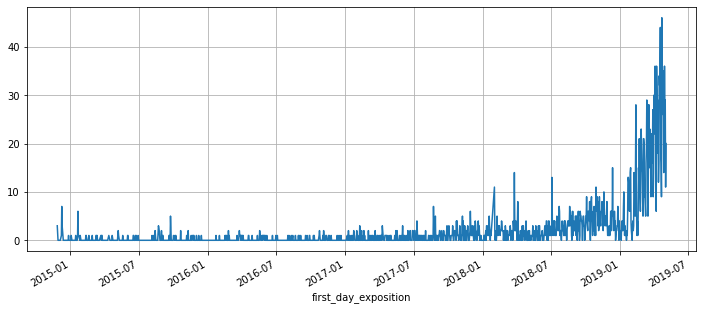

In [29]:
# Для наглядности построим график распределения пропусков в столбце days_exposition по годам

data.groupby('first_day_exposition')['days_exposition'].apply(lambda _data: _data.isna().sum()).plot(grid=True, figsize=(12, 5))
plt.show()

Таким образом было выявленно, что пропуски возрастают по годам, что позволяет предположить, что такие обьявления все еще не сняты с продаж. Поэтому эти значения мы оставим как есть. При этом запомним, что есть небольшое колиство обьявлений которые опубликованы несколько лет назад, но так до сих пор остаются открытыми. 

In [30]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

<font color='green'>**Шаг 6. в столбце locality_name заменить пропуски на "unknown". Заменим названия в столбце 'locality_name'. Для этого заменим 'ё' на 'е' и 'городской поселок' на 'поселок городского типа'**</font>

In [31]:
# Изучим уникальные значения в столбце с названиями населённых пунктов и устраним неявные дубликаты. 
# Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — 
# это обозначения одних и тех же населённых пунктов. 

# Отсортируем и выведем уникальные значения в столбце 'locality_name'.

data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [32]:
# Заменим названия в столбце 'locality_name'. Для этого заменим 'ё' на 'е' и 'городской поселок' на 'поселок городского типа'. 

data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
# пропуски в столбце заменим на значение "unknown"
data['locality_name'] = data['locality_name'].fillna("unknown")
data['locality_name'].isna().sum()

0

<div style="border:solid green 2px; padding: 20px">
<b>Вывод</b> 
    
Выполнена первая предобработка данных. 
- Теперь цены квартир отображаются в тысячах рублей
- лишние нули не мешаютсяв поле "дата размещения" осталась только дата без времени
- высоты потолков приведены к реалистичным
- пропуски в жилых площадях и площадях кухнь заполненыпропущенные значения 
- в полях "апартаменты" и "балкон" заполнены 
- квартирам-студям назначено единое число комнат 0
- столбец cityCenters_nearest переименован
- данные приведены к целочисленным, где это возможно
Возможно, следует доработать форму подачи объявлений и дополнить ее контролем вводимых данных. Более глубокий анализ выбивающихся и нереалистичных значений будет проведен в дальнейшем.

In [33]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,23699.00,23613.00,23699.00,23699.00,23699.00,23699.00,18157.00,18180.00,23699.00,8079.00,23699.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.70,10.67,34.15,5.89,10.47,0.59,28793.67,14191.28,0.47,490.80,0.59,517.98,180.89
std,5.68,10887013.27,35.65,1.08,0.22,6.60,19.94,4.89,6.07,0.96,12630.88,8608.39,0.75,342.32,0.88,277.72,219.73
min,0.00,12190.00,12.00,0.00,2.00,1.00,4.58,1.00,0.00,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.60,5.00,19.00,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,26726.00,13098.50,0.00,455.00,0.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.70,16.00,42.00,8.00,12.00,1.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,6.00,60.00,200.00,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


### Посчитайте и добавьте в таблицу новые столбцы<a id='d'></a>

In [34]:
# Добавим в таблицу новые столбцы.

# Цена одного квадратного метра:
data['one_meter_price'] = data['last_price'] / data['total_area']

# День недели публикации объявления (0 — понедельник, 1 — вторник и так далее):
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

# Месяц публикации объявления:
data['month_exposition'] = data['first_day_exposition'].dt.month

# Год публикации объявления:
data['year_exposition'] = data['first_day_exposition'].dt.year

# Тип этажа квартиры (значения — «первый», «последний», «другой»):
def typefloor(data):
    try:
        if data['floor'] == 1:
            return 'первый'
        elif data['floor'] == data['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        'нет данных'
data['type_of_floor'] = data.apply(typefloor, axis=1)
    
# Расстояние до центра города в километрах (переведём из м в км и округлим до целых значений):
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()

# Выведем обновлённый датафрейм.
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_meter_price,weekday_exposition,month_exposition,year_exposition,type_of_floor,city_centers_nearest_km
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой,16.00
1,7,3350000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2.00,поселок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый,19.00
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой,14.00
3,0,64900000.00,159.00,2015-07-24,3,2.65,14.00,91.18,9,False,False,False,27.58,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,408176.10,4,7,2015,другой,7.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0.00,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,100000.00,1,6,2018,другой,8.00
5,10,2890000.00,30.40,2018-09-10,1,2.65,12.00,14.40,5,False,False,False,9.10,0.00,поселок городского типа Янино-1,NaN,NaN,0.00,NaN,0.00,NaN,55.00,95065.79,0,9,2018,другой,NaN
6,6,3700000.00,37.30,2017-11-02,1,2.65,26.00,18.32,6,False,False,False,14.40,1.00,поселок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00,99195.71,3,11,2017,другой,19.00
7,5,7915000.00,71.60,2019-04-18,2,2.65,24.00,41.06,22,False,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN,110544.69,3,4,2019,другой,12.00
8,20,2900000.00,33.16,2018-05-23,1,2.65,27.00,15.43,26,False,False,False,8.81,0.00,поселок Мурино,NaN,NaN,0.00,NaN,0.00,NaN,189.00,87454.76,2,5,2018,другой,NaN
9,18,5400000.00,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00,88524.59,6,2,2017,другой,15.00


### Проведите исследовательский анализ данных<a id='f'></a>

<font color='green'>**В данном проекте нужно изучить следующие параметры объектов: 
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.
Постройте отдельные гистограммы для каждого из этих параметров.**</font>


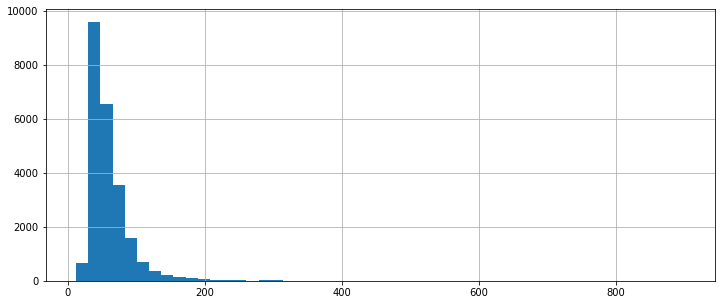

count   23699.00
mean       60.35
std        35.65
min        12.00
25%        40.00
50%        52.00
75%        69.90
max       900.00
Name: total_area, dtype: float64

In [35]:
#для реализации данных задач создадим функцию, которая сразу строим гистограмму и метод describe()
def gist(index):
    data[index].hist(figsize=(12, 5), bins=50)
    plt.show()
    display(data[index].describe())
gist('total_area') 

In [36]:
# площадь  более 300 м можно считать выбросами. Удалим данные с такими значениями
data = data.loc[data['total_area'] <= 300]

In [37]:
# строим сводную таблицу
data_total_area=data.pivot_table(index = 'rooms', values = 'total_area', aggfunc = 'count')
display(data_total_area)

,total_area
rooms,
0,196
1,8046
2,7940
3,5813
4,1175
5,310
6,96
7,43
8,8


При обработке данных мы не обратили внимание на столбец total_area, сейчас при постороение гистограммы были обнаружены выбросы - кваритры общей площадью больше 300 м². При использование метода describe() мы видим, что максимальное значение 900м².что говорит о наличии выбросов в верхних значениях. Эти выбросы происходят за счёт наличия в датафрейме данных об «элитных» квартирах (скорее всего в Санкт-Петербурге), которые завышают средние показатели площади. Поэтому такие выбросы лучше удалить.  

Теперь мы видим, что в среднем большинство обьявлений квартир с общей площадью от 40 до 50 м², что не удивительно, т.к чаще всего продаются 1 и 2-комнатные квартиры, что как раз подтверждает сводная таблица(в сумме на 1и 2 комнатные квартиры приходится 15986 объявлений)

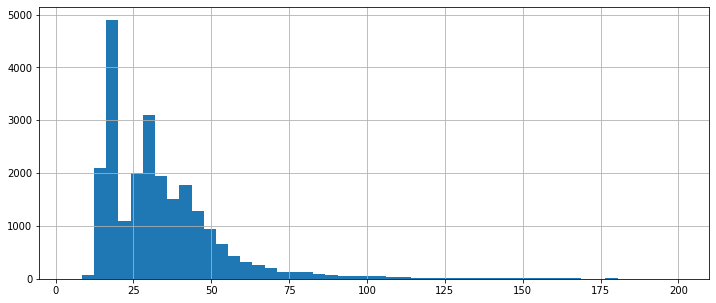

count   23638.00
mean       34.03
std        19.53
min         4.58
25%        19.00
50%        30.00
75%        42.00
max       200.00
Name: living_area, dtype: float64

In [38]:
gist('living_area')    

Гисторамма частоты значений жилой площади имеет вид распределения Пуассона.
Среднее значение жилой площади 34,03 м² немного выше медианы 30,0 м², что говорит о наличии выбросов в верхних значениях (аналогично пункту выше). В большинстве случаев жилая площадь квартир составляет от 19 м² до 42,0 м². Правда из всей этой картины выбивается минимальное значение 4.58, а это значит что где-то в расчетах мы не учли такую ситуацию.

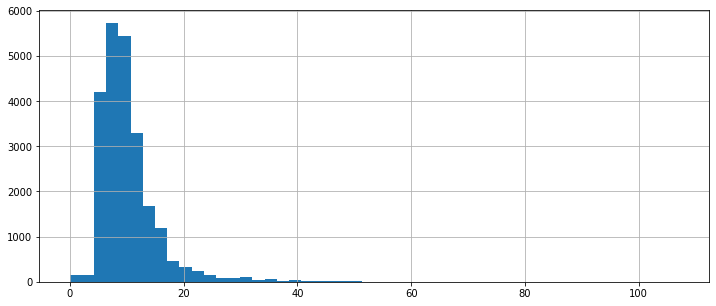

count   23638.00
mean       10.38
std         5.71
min         0.00
25%         7.00
50%         9.00
75%        12.00
max       107.00
Name: kitchen_area, dtype: float64

In [39]:
gist('kitchen_area')

Рассмотри более подробно ситацию с площадью кухни. Во-первых учтем тот момент, что в студиях размер кухни отдельно не указывается, т.к она соединена с общим жилым пространством, поэтому в рамках данного проекта мы указали площадь кухонь равную нулю. В среднем же получилось около 9 м², что является не плохим резултатом. 

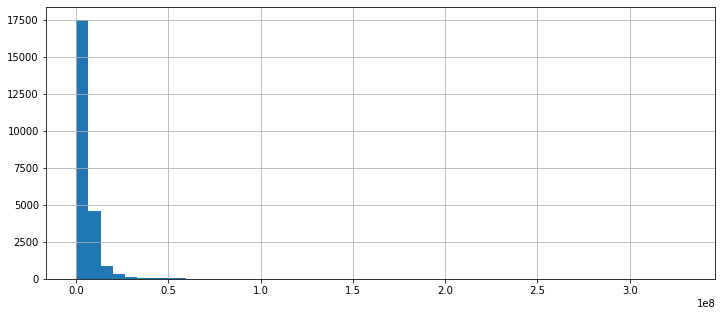

count       23638.00
mean      6306195.18
std       7770378.90
min         12190.00
25%       3400000.00
50%       4620000.00
75%       6750000.00
max     330000000.00
Name: last_price, dtype: float64

In [40]:
gist('last_price')

In [41]:
# строим сводную таблицу
data_price=data.pivot_table(index = 'locality_name', values = 'last_price', aggfunc = 'count').sort_values(by='last_price', ascending=False)
display(data_price)

,last_price
locality_name,
Санкт-Петербург,15664
поселок Мурино,556
поселок Шушары,440
Всеволожск,398
Пушкин,367
...,...
поселок Белоостров,1
поселок Высокоключевой,1
поселок Гладкое,1


Интересно обстоят дела со стоиомстью квартир, видно что есть аноиальные значения, такие как минимум и максимум. Но в целом видна  средняя стоимость квартир от 4.6 до 6.3 млн рублей, что соответвует рыночной стоимости. При этом стоит помнить, что в таблице  всего 23638 обьявлений, а на город Санкт-Петербург приходиться лишь 15664. Поэтому влияние не городской цены имеет место быть.

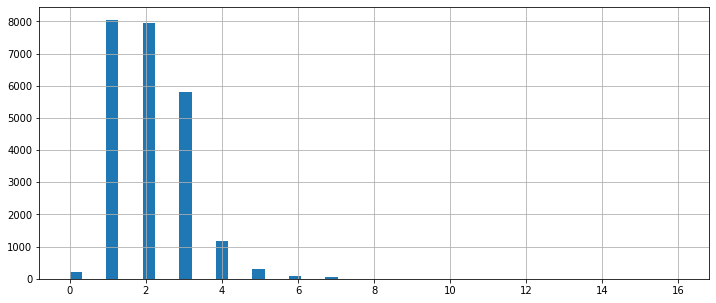

count   23638.00
mean        2.06
std         1.05
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        16.00
Name: rooms, dtype: float64

In [42]:
gist('rooms')

Итак, как говрилось ранее, большинство квартир представлено в 1 или 2комнатном варианте, также пристусвует незначителньое количество студий. 

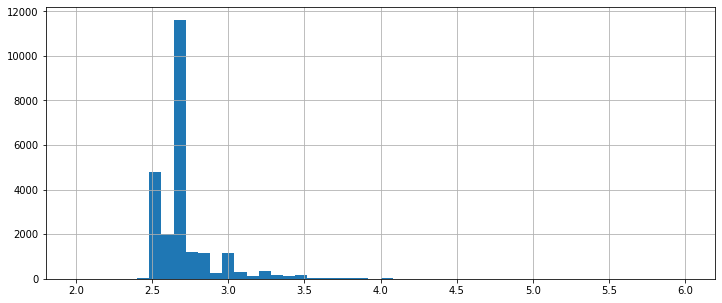

count   23638.00
mean        2.70
std         0.22
min         2.00
25%         2.60
50%         2.65
75%         2.70
max         6.00
Name: ceiling_height, dtype: float64

In [43]:
gist('ceiling_height')

Среднее значение высоты потолков 2,69 м почти совпадает с медианой 2,65 м. В большинстве случаев высота потолков составляет от 2,60 м до 2,70 м.

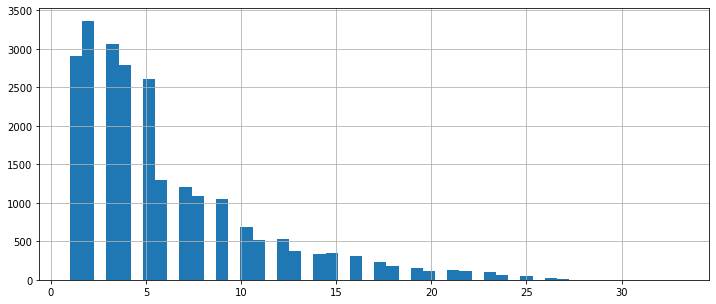

count   23638.00
mean        5.89
std         4.89
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

In [44]:
gist('floor')

Среднее значение этажа квартиры 5.89 выше медианы 4. Здесь также может играть факт, того что почти половину обьявлений приходится на пригород, где распростанены 5 и 9 этажные дома. В большинстве случаев квартиры расположены от 2 до 8 этажей.

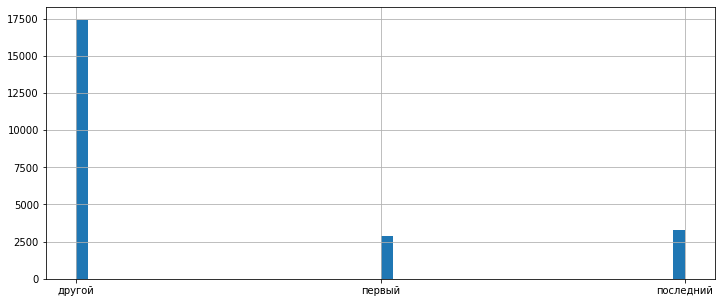

count      23638
unique         3
top       другой
freq       17416
Name: type_of_floor, dtype: object

In [45]:
# тип этажа квартиры («первый», «последний», «другой»)
gist('type_of_floor')

Вполне логичный график, единственное отметим, что на последнем этаже больше квартир чем на первом. 

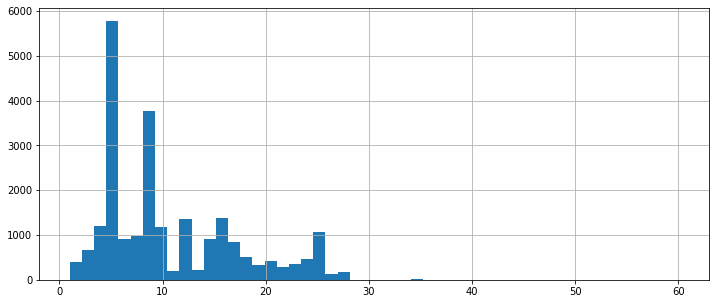

count   23552.00
mean       10.68
std         6.60
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

In [46]:
gist('floors_total')

Опять же в данном графике находим подтвержение,  того что почти половину обьявлений приходится на пригород, где распростанены 5 и 9 этажные дома. Что весьма логично, ведь в основ территория России застроина типовыми постройками, типо хрущевок и сталинок. Лишь последние 20летие отмечно резкой любви застройщиков к многоэтажкам. 

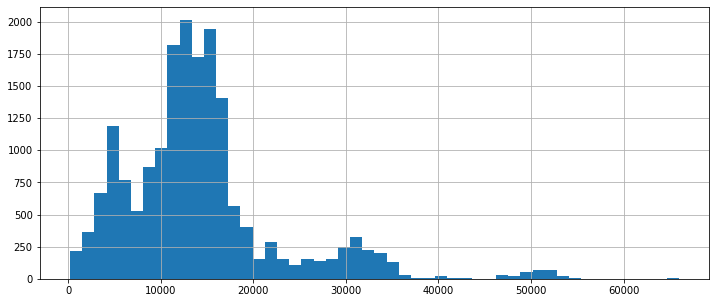

count   18121.00
mean    14210.94
std      8605.55
min       181.00
25%      9271.00
50%     13114.00
75%     16296.00
max     65968.00
Name: city_centers_nearest, dtype: float64

In [47]:
gist('city_centers_nearest')

Среднее значение расстояния до центра города 14210 м немного выше медианы 13114 м. Скорее всего, основной вклад в отличие среднего от медианы вносит Санкт-Петербург из-за относительно большей площади (а значит и множества вариантов разброса месторасположения квартир по городу), а также это указывает на неравномерность плотности жилой застройки.

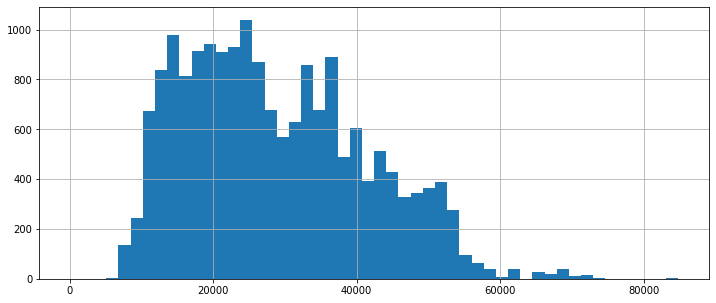

count   18100.00
mean    28798.12
std     12642.55
min         0.00
25%     18573.75
50%     26751.00
75%     37288.00
max     84869.00
Name: airports_nearest, dtype: float64

In [48]:
gist('airports_nearest')

В Санкт-Петербурге действует один международный аэропорт — Пулково (LED). Он находится в 15 км от центра города, в Московском районе. Следовательно, достаточно много квартир находятся гораздо дальше от центра города, не забываем также про большое количество пригородов. 

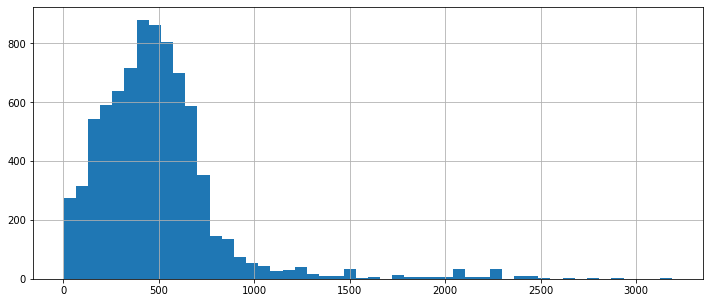

count   8041.00
mean     490.98
std      342.37
min        1.00
25%      288.00
50%      455.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

In [49]:
gist('parks_nearest')

В Санкт-Петербурге удивительно большое количество парков, поэтому в большинстве своем от квартиры до ближайщего парка не так уж и долги идти. Единственная ложка дегтя, в том что в данном столбце имеются пропуски в размере 15620 записей. Таким образом точно оценить ситуацию мы не можем. 

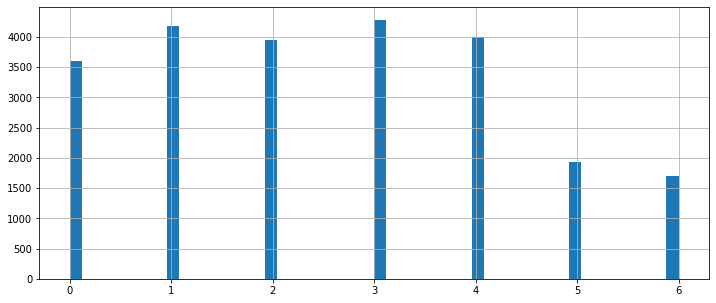

count   23638.00
mean        2.57
std         1.79
min         0.00
25%         1.00
50%         3.00
75%         4.00
max         6.00
Name: weekday_exposition, dtype: float64

In [50]:
gist('weekday_exposition')

В большинстве случаев объявления публиковались по будням, лидируют – вторник и четверг. Этот факт нужно учесть, для того чтобы быть готовым к загрузу серверов в эти дни.

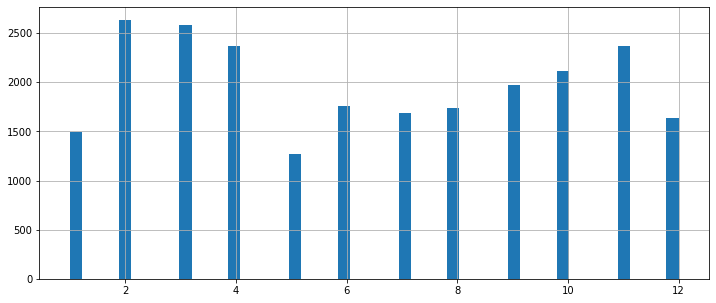

count   23638.00
mean        6.40
std         3.49
min         1.00
25%         3.00
50%         6.00
75%        10.00
max        12.00
Name: month_exposition, dtype: float64

In [51]:
gist('month_exposition')

Из месяцев лидируют конец зимы - начало весны (февраль, март, апрель) и ноябрь. Видимо психологический фактор подталкивает людей на обновление жил площади или жажду перемен. Провалы наблюдаются в январе, мае, декабре (видимо, связано с праздниками). Летом объявления также публиковалось не много, т.к многие уезжают отдыхать или на дачу.

<font color='green'>**Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
- Постройте гистограмму.
- Посчитайте среднее и медиану.
- В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?**</font>


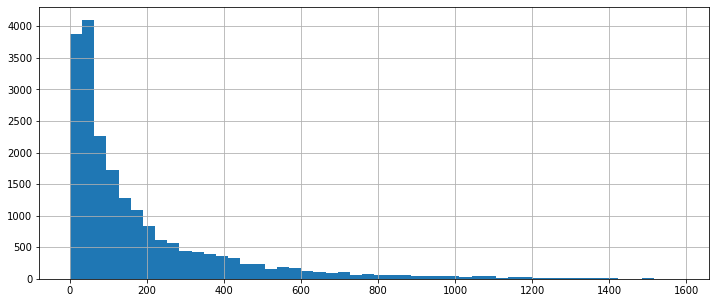

count   20470.00
mean      180.65
std       219.51
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

In [52]:
gist('days_exposition')

Среднее значение количества дней, в течение которых было размещено объявление, 180 дней почти в 2 раза больше медианы 95 дней. Это говорит о том, что в датафрейме есть объявления, которые были размещены достаточно долго. В большинстве случаев объявление было размещено от 45 до 231 дня. Это и есть время продажи. Быстрые продажи - от 1 до 45 дней, долгие - от 231 до 1580 дней. Опять же не забываем, что некоторые обьявления до сих пор актуальны. На такую ситуацию влияет множетсво факторов, но самый главный это частота визитов потенциальных покупателей.

<font color='green'>**Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.**</font>


In [53]:
#строим матрицу корреляции для количесвтенных значений
corr=data[['last_price', 'total_area', 'living_area','kitchen_area','rooms']].corr()
display(corr.style.background_gradient(cmap='coolwarm'))

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.676724,0.589143,0.532049,0.394933
total_area,0.676724,1.000000,0.936815,0.629491,0.784958
living_area,0.589143,0.936815,1.000000,0.433621,0.852602
kitchen_area,0.532049,0.629491,0.433621,1.000000,0.302052
rooms,0.394933,0.784958,0.852602,0.302052,1.000000


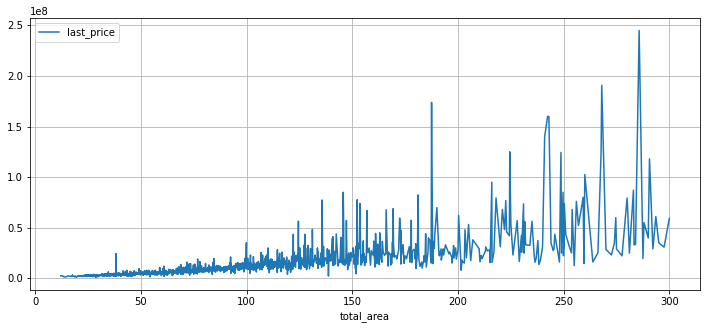

In [54]:
#создадим функцию для посторения графиков для каждого параметра сравнения
def grafik(index):
    data.pivot_table(index=index, values='last_price').plot(grid=True, figsize=(12, 5))
    plt.show()
grafik('total_area')

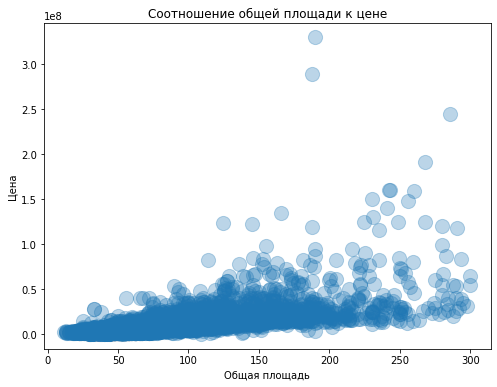

In [55]:
# соотношение общей площади к цене
data.plot.scatter(x='total_area', y='last_price', s=200,  figsize=(8,6), alpha=0.3)
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.title('Соотношение общей площади к цене')
plt.show()

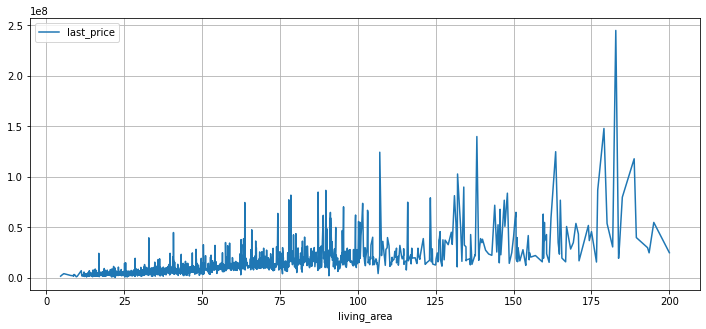

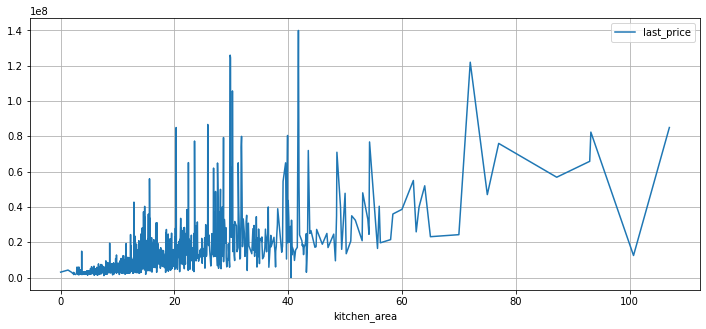

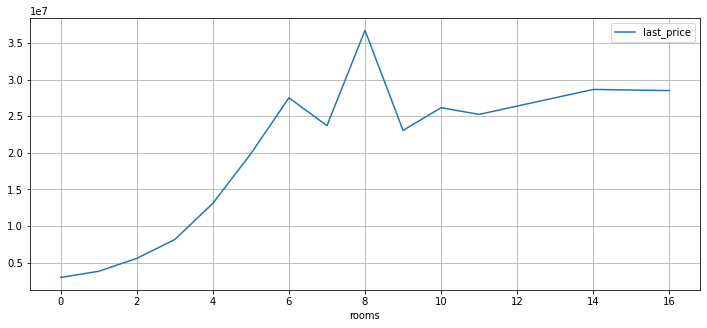

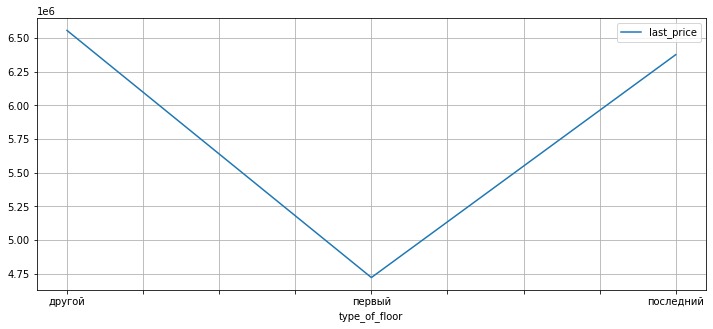

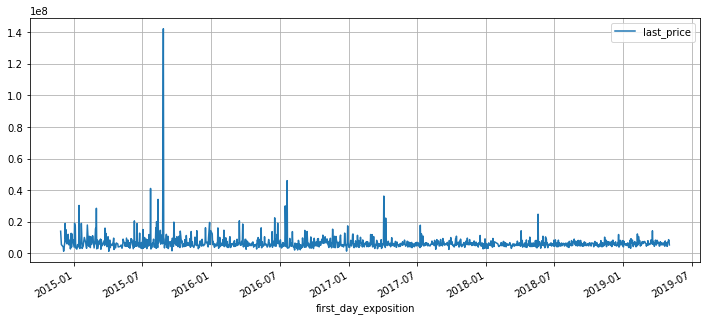

In [56]:
grafik('living_area')
grafik('kitchen_area')
grafik('rooms')
grafik('type_of_floor')
grafik('first_day_exposition')

Матрица корреляции помогает сразу определить зависимость между независимыми переменными набора данных. Все коэффициенты корреляции по диагонали таблицы равны 1, потому что каждая переменная совершенна коррелирует сам с собой. Все остальные коэффициенты корреляции указывают на корреляцию между различными попарными комбинациями переменных. Чем дальше коэффициент корреляции от нуля, тем сильнее связь между двумя переменными. При оценке силы связи коэффициентов корреляции используется шкала Чеддока:от 0 до 0,3-очень слабая; от 0,3 до 0,5-слабая; от 0, 5 до 0,7-	средняя;от 0,7 до 0, 9-	высокая; от 0,9 до 1-очень высокая

Зависимоти между общей (полной) стоимостью объекта и общей площадью составляет 0,67; жилой площадью - 0,58; площадью кухни - 0,53; количеством комнат - 0,39. Такой результат показывает, что зависимость сущетсвует, но она средняя от общей площади, и слабая от количества комнат. Построенные графики также подтверждают полученные результаты. Поэтому полагаться на такаю зависимость не следует.

Типы данных для этажа, на котором расположена квартира и даты размещения не являются числовыми, поэтому коэффициент корреляции Пирсона к ним применить нельзя. Поэтому будем ориентироваться на показатели графиков:стоимость квартир на первом этаже (около 4,8 млн руб.) дешевле стоимости квартир на других этажах, что соответвует рыночным реалиям. Разница в стоимости квартир между последним и другими этажами - несущественная.
Зависимости роста общей стоимости объектов от даты размещения, в целом, за несколько лет не наблюдается.

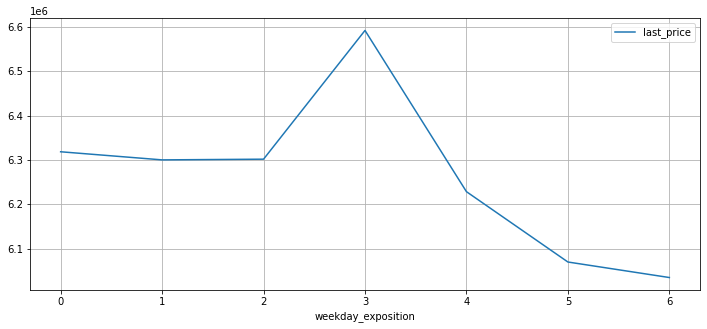

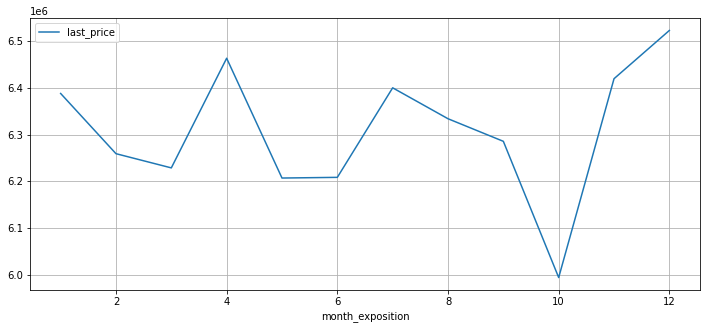

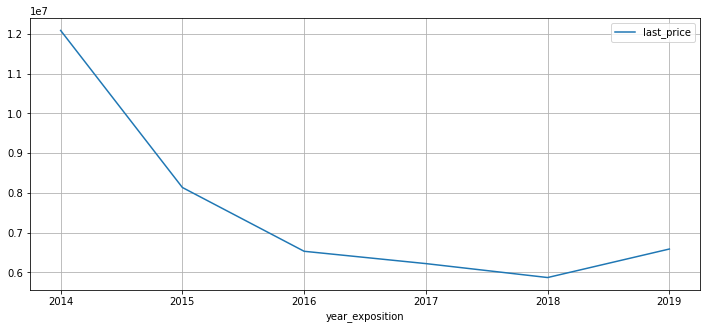

In [57]:
#недостающие графики 
grafik('weekday_exposition')
grafik('month_exposition')
grafik('year_exposition')

Самые высокие цены по четвергам, а самые низкие по воскресениям. Самая низкая стоимость зафиксирована в октябре, в апреле и июле практически на равных высокие позиции, пик приходится на декабрь. Неожиданно, что цена с каждым годом падает.

<font color='green'>**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name**</font>


In [58]:
# Выведем список 10 населённых пунктах с наибольшим числом объявлений:
data.value_counts('locality_name').head(10)

locality_name
Санкт-Петербург      15664
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 367
Колпино                337
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
dtype: int64

In [59]:
# Теперь посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
price_mean=data.pivot_table(index = 'locality_name', values = 'one_meter_price', aggfunc = ['count', 'mean']).sort_values(by=('count', 'one_meter_price'), ascending=False)
display(price_mean.head(10))

,count,mean
,one_meter_price,one_meter_price
locality_name,,
Санкт-Петербург,15664,114382.13
поселок Мурино,556,85681.76
поселок Шушары,440,78677.36
Всеволожск,398,68654.47
Пушкин,367,103130.85
Колпино,337,75333.30
поселок Парголово,327,90175.91
Гатчина,307,68746.15


Таким образом, логично, что самый дорогой квадратный метр жилья будет стоить во второй столице России-городе Санкт-Петербурге, а самый дешевый из десяти населённых пунктах с наибольшим числом объявлений, в самой отдаленной ею частью - Выборге. 

<font color='green'>**Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**</font>


In [60]:
# Вычислим среднюю цену каждого километра до центра для data и сохраним результаты в дополнительный столбец 'price_per_km':

data['price_per_km'] = data['last_price'] / data['city_centers_nearest_km']

# В столбце 'cityCenters_nearest_km' встречаются значения, равные 0. 
data = data.query('city_centers_nearest_km != 0')
# Теперь вычислим среднюю цену каждого километра до центра для квартир в Санкт-Петербурге:

price_km_city = data.pivot_table(index='locality_name', values='price_per_km')
price_km_city = price_km_city.query('locality_name in "Санкт-Петербург"')

display(price_km_city)

,price_per_km
locality_name,
Санкт-Петербург,1286894.53


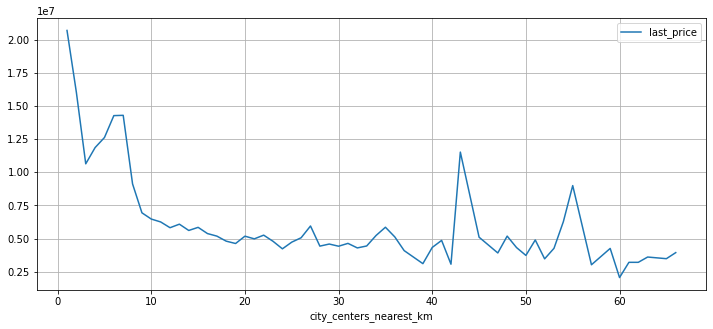

In [61]:
# Итак, средняя цена за один километр до центра в Санкт-Петербурге около 1286894.53 руб.
# Опишем, как стоимость объектов зависит от расстояния до центра города:

data.pivot_table(index='city_centers_nearest_km', values='last_price').plot(grid=True, figsize=(12, 5))
plt.show()

Cтоимость объектов падает в зависити от расстояния до центра Санкт-Петербурга. Тем не менее, в области 43 и 55 км наблюдаются пики в стоимости. Возможно, это связано с расположенном на этом расстоянии загородном "элитном" жилье близ Санкт-Петербурга, в духе Рублевки.

### Общий вывод<a id='g'></a>

<div style="border:solid green 2px; padding: 20px">


**Цель исследования** — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. В дальнейшем это поможет установить приоритетные параметры для автоматизации систем сервиса, которые помогут отследить аномалии и мошенническую деятельность.


Для начала была проанализирована исходная таблица в размере 23699 строк в 22 столбцах. Во многих столбцах были обнаружены пропуски, которые возникли и по причине пользователей (например, не указано количество балконов и т.п) и картографические ошибки (например, не указано количество водоемов/парков). Для их устранения были проведены следующие действия:
- в столбцах parks_around3000, ponds_around3000, balcony пропуски были заменены на ноль. В этих же столбцах для удобства расчетов вещественный тип переведем в целочисленный 
 - в стобце first_day_exposition отредактировали запись даты и поменяем его тип на датетайм.
 - в столбцах ceiling_height, living_area, kitchen_area были обнаружены аномалии-значения, которые не отражают действительность и появились по какой-то ошибке(указана высота потолков от 1м до 100) и пропуски, которые были заменены медианным значением сооьветсвующим конкретным столбцам.
 - при посроение графиков по столбцу days_exposition была обнаружена тендеция незакрытых обьявлений за 2019 год
 - были обработаны неявные дубликаты (раньше названия населенных пунктов повторялись из-за разной записи е-ё и т.п)

Для того чтобы провести исследовательский анализ данных в датафрейм были добавлены новые показатели:цена одного квадратного метра; день недели публикации объявления (0 — понедельник, 1 — вторник и так далее); месяц публикации объявления; год публикации объявления; тип этажа квартиры (значения — «первый», «последний», «другой»); расстояние до центра города в километрах (перевели из м в км и округлили до целых значений). Сделаны графики соотношений цены к другим показателям квартир. 

Были обнаружены интересные результаты, например, в большинстве случаев объявления публиковались по будням, лидировали – вторник и четверг. Этот факт нужно учесть, для того чтобы быть готовым к загрузу серверов в эти дни. При этом длительность размещения квартиры на площадке Яндекса равняется 180 дням, а медиана равна 95 дням. В большинстве случаев объявление было размещено от 45 до 231 дня. Это и есть время продажи. Быстрые продажи - от 1 до 45 дней, долгие - от 231 до 1580 дней. Опять же не забываем, что некоторые обьявления до сих пор актуальны. На такую ситуацию влияет множетсво факторов, но самый главный это частота визитов потенциальных покупателей. Думаю, что такому показателю стоит уделить внимание.

В ходе посторения матрицы корреляции, было обнаружено, что ависимоть между общей (полной) стоимостью объекта и общей площадью составляет 0,67; жилой площадью - 0,58; площадью кухни - 0,53; количеством комнат - 0,39. Такой результат показывает, что зависимость сущетсвует, но она средняя от общей площади, и слабая от количества комнат. Построенные графики также подтверждают полученные результаты. Поэтому полагаться на такаю зависимость не следует. Разница в стоимости квартир между последним и другими этажами - несущественная, самый "дешевый" этаж первый. Зависимости роста общей стоимости объектов от даты размещения, в целом, за несколько лет не наблюдается.

Самый дорогой квадратный метр жилья в городе Санкт-Петербурге - 114382.13 тыс. рублей, а самый дешевый из десяти населённых пунктах с наибольшим числом объявлений, в самой отдаленной ею частью - Выборге -58141.91 тыс. рублей. Cтоимость объектов падает в зависити от расстояния до центра Санкт-Петербурга, средняя цена за один километр до центра в Санкт-Петербурге около 1286894.53 руб.

**Рекомендации**:
- следует оптимизировать названия населенных пунктов. Скорее всего, часть некорректных и пропущенных значений является ошибками ввода, также стоит добавить точный адрес квартиры;
- при вводе целочисленных значений лучше всего ограничеть, например высота потолка не дложна быть выше 6 м, при попытке ввести большее значение выдавать ошибку или предлагать пользователю сменить статус "квартиры" на "дом"; 
- Для более точной оценки рыночной стоимости квартиры, следует учитывать и такие факторы, как расстояние до метро, год постройки, наличие лифта, ремонт квартиры, электрическая или газовая плита, есть ли горячее водоснабжение или имеется газовая колонка.

